# TP 1: Get familiar with Keras, Multi-Layer Perceptrons (MLPs) and Convolutional Neural Networks (CNNs)

## Objective of the following tutorial: Implement a MLP and a CNN on CIFAR-10 data using `tensorflow`

**Tensorflow**: one of the most commonly used frameworks for deep learning

**Keras**: high-API available for different frameworks

**Useful links**:
- [Keras official website](https://keras.io/)
- [Keras cheat sheet](https://drive.google.com/file/d/1BDN0Kk_E4jkebaInd2vge-1Q3FaZCtdl/view)
- Overview of how to use Keras in Tensorflow: https://www.tensorflow.org/guide/keras/overview
- Some tutorials can be found on the official website of Tensorflow on MNIST data, FashionMNIST (pay attention to the version of tensorflow used)


**Courses/Research papers**:
- Books:
    - Deep Learning Book, Ian Goodfellow, Yoshua Bengio and Aaron Courville (++)
    - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Oreilly Edition, Geron Aurelien
- Website/MOOC:
    - Udacity
    - Coursera, Andrew NG : https://www.coursera.org/learn/deep-neural-network/ (++)
    - http://ufldl.stanford.edu/tutorial/ ([Videos](https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv))
    - http://deeplearning.net/tutorial/
    - CNN: http://cs231n.github.io/ (++)
- Videos:
    - YouTuber: Hugo Larochelle
    - Two Minute Papers Channel

# 0. Good practice

- Modularity: organize your code in different scripts to be able to modify specific function if needed, and to avoid overloading your jupyter notebook (this can cause a lot of untracktable errors).

## 1. Example with Keras

### a) Set your environnement

#### Instructions for people who use their own device:

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

##### Launch a jupyter notebook from a terminal

```bash
jupyter notebook
```

In order not to see the messages from jupyter notebook :

```bash
jupyter notebook --port 8890 < /dev/null &>/dev/null &
```

##### Manage GPU usage

From a terminal, you can launch the following command to manage NVIDIA GPU ressources, allocation between different users...

```bash
watch -n1 nvidia-smi
```
```-n``` means every second it is updated.

In case different GPUs exist and some are already used, you can select one available by its ID:

In [ ]:
## Uncomment the following lines if you are using your personal device and you have more than 1 gpu available.
## Switch the GPU ID from "0" to any other ID you want to use
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0" #HERE, you select GPU:0

#### Instructions for people who use a remote device:

To execute the code on Google Collab go to tab Runtime (Execution) > Change runtime type (Modifier le type d'exécution). Select GPU in Hardware accelerator.

### b) Load the useful packages

In [3]:
import scipy # scientific computing library
import numpy as np # manipulate N-dimensional arrays
import pandas as pd # dataframes
import matplotlib.pyplot as plt # data plotting
import seaborn # advanced data plotting
from sklearn import preprocessing # basic ML models and processing functions

import tensorflow as tf

import os

Check the version of Tensorflow

In [4]:
tf.__version__

'2.17.0'

Check if you can use a GPU

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


If the framework is able to detect that a GPU can be used, the code is supposed to run on a GPU. In low-level API, you might specify that your code should run on  GPU.

Check whether your code is running on GPU

In [7]:
## Uncomment this code if you want to check

# tf.debugging.set_log_device_placement(True)

# # Create some tensors
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)



In [8]:
# tf.debugging.set_log_device_placement(False)

It seems that tf.debugging.set_log_device_placement() once is activated cannot be reset.

### c) Load the data

#### Description of the data
There are  labeled subsets of the 80 million tiny images dataset and consists of 60000 **32x32** RGB images in 10 classes, with 6000 images per class. There are **50000 training images** and **10000 test images**. Source: https://www.cs.toronto.edu/~kriz/cifar.html

You can download in the same way MNIST or Fashion-MNIST dataset. Please refer to the documentation: https://keras.io/datasets/.

The data can be directly downloaded with Keras.

In [9]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K

In [10]:
K.set_image_data_format('channels_last')
(x_train_original, y_train_original), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train_original.shape)
print(x_train_original.shape[0], 'train samples')
print(y_train_original.shape, 'train samples')
print(x_test.shape[0], 'test samples')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
(50000, 1) train samples
10000 test samples


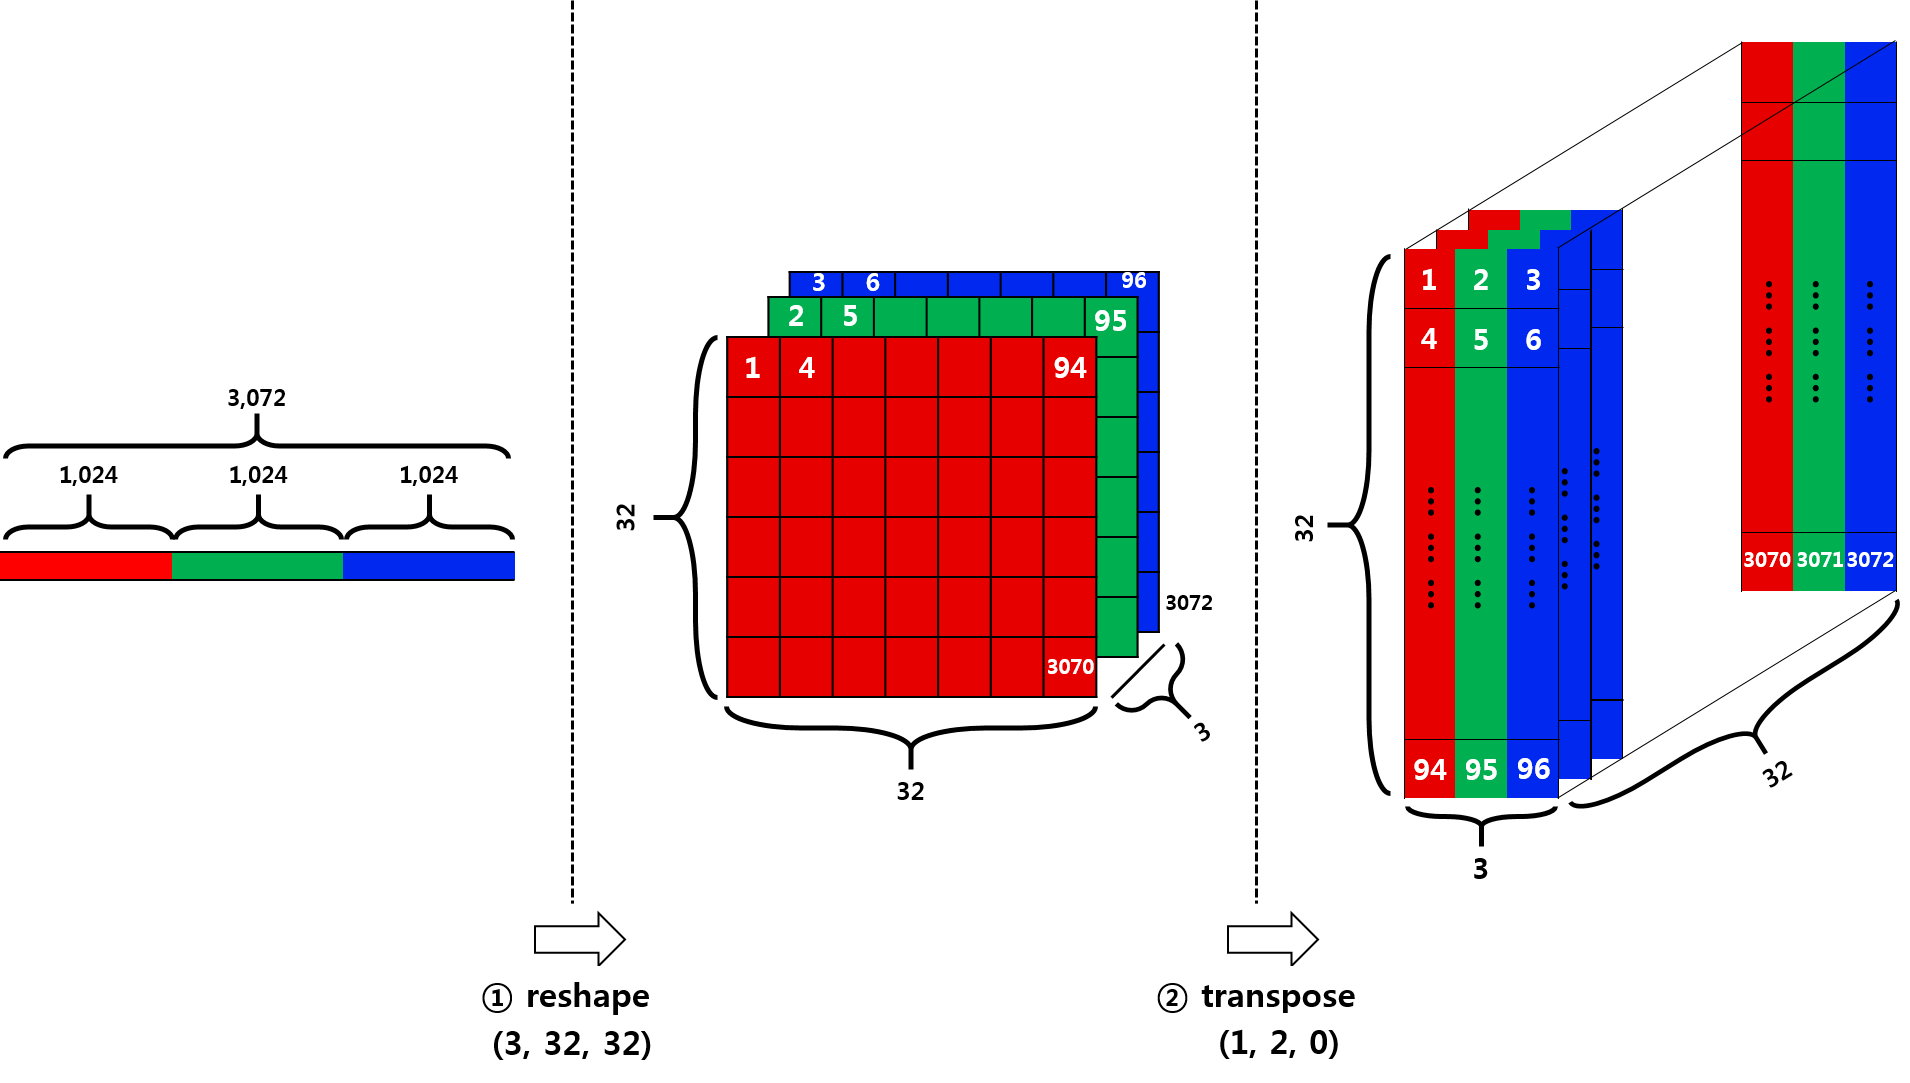

In [11]:
# Check number of classes

num_classes = y_train_original.max() +1
num_classes

10

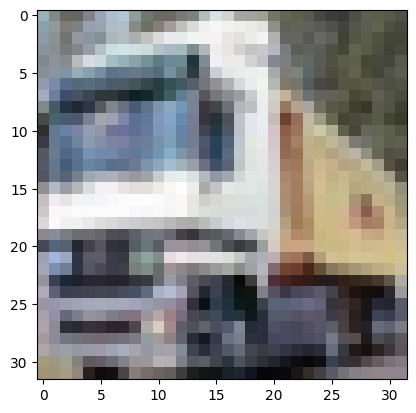

In [12]:
plt.imshow(x_train_original[1])

In [13]:
# Check the class labels

y_train_original

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
LABELS = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

### d) Preprocess the data

- Data cleaning
- Data conversion
- Data normalization
- Data split

#### Data split

Split: Train 40000, Val 10000, Test 10000.

In [15]:
from sklearn.model_selection import train_test_split

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html <br>
Use option *stratify* to keep the orginal proportions
*shuffle* can be set to True

Why should we use *random_state* ?

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train_original, y_train_original, test_size=10000, random_state=42, shuffle=True,stratify=y_train_original)

Check:

In [17]:
x_train.shape

(40000, 32, 32, 3)

In [18]:
x_val.shape

(10000, 32, 32, 3)

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
# Check number of samples inside each class
from collections import Counter

In [21]:
Counter(list(y_train.reshape(-1)))


Counter({6: 4000,
         7: 4000,
         8: 4000,
         3: 4000,
         2: 4000,
         1: 4000,
         4: 4000,
         9: 4000,
         0: 4000,
         5: 4000})

In [22]:
Counter(list(y_test.reshape(-1)))


Counter({3: 1000,
         8: 1000,
         0: 1000,
         6: 1000,
         1: 1000,
         9: 1000,
         5: 1000,
         7: 1000,
         4: 1000,
         2: 1000})

#### Convert class vectors to binary class matrices (one-hot encoding)

The output layer of the neural network contains as many neurons as there are classes. For a given sample, each output neuron gives the probability to belong to the corresponding class.
The ground-truth labels need to be formated in the same way such as for each sample, we have a vector of shape the number of classes: i.e., ${y}_{i,k}=1$ when the $i$-th sample belongs to the class $k$, or $0$ otherwise. Note that $\sum_{k=1}^K{y}_{i,k}=1$.

This will help the comparison in the loss function:
$L=\sum_{i=1}^N \sum_{k=1}^K \left( -y_{i,k}\log\hat{y}_{i,k} \right)$ where ${y}_{i,k}$ is the indicator of the true class, $\hat{y}_{i,k}$ is the probability that the $i$-th sample belongs to the class $k$, $N$ and $K$ are respectively the number of samples in the training set and the number of classes




In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_original.shape

(50000, 1)

In [25]:
y_train_original = to_categorical(y_train_original, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [26]:
# New shape of the labels
y_train_original.shape

(50000, 10)

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

#### Normalize the data

Generally, the data should be normalized. Why ?

 The most used methods are MinMaxScaler and Standardizing (centrage-réduction). Source: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Here, the MinMax scaling is used : $\frac{x-\min(x)}{\max(x)-\min(x)}$  
The images are just divided by the maximun value of a pixel because the minimum is 0.

In [27]:
# The data must be converted into float in order to normalize them. Since we know the minimum (0.) and the maximum value of a pixel (255.), we can proceed by normalizing by hand.
# However, depending on the dataset, it is good practice to use built-in scaling functions from tensorflow or scikit-learn for instance.
x_train_original = x_train_original.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train_original /= 255
x_test /= 255
x_train /= 255
x_val /= 255

In [28]:
# Check new minimum and maximum values
x_train.max(), x_train.min()

(1.0, 0.0)

More functions: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing



### e) Implement the model

### **ToolBox:**
- Instantiate the **architecture** of your network: (there are also hyperparameters)
    - number of layers (depth);
    - number of neurons by layer (width);
    - type of layer (non-linearity);
    - links between the layers (batchnorm, dropout);
    - model's specificities (CNN, RNN...)
    /!\ Some regularization methods have also some hyperparameters to adjust
- Determine the hyperparameters of the **training** :
    - weights initialization;
    - the optimizer for the training and the learning rate;
    - size of the batch, number of epochs;
    - **regularizers** : L1/L2 ($\alpha$), early stopping, [data augmentation](https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844) (pertubation of the input data)  

See slide : Bonne Pratique for default hyperparameters (slide 11)

**The model implemented:**

**Input**: CIFAR-10 data (32x32)  

**Output**: one-hot vector with 10 classes  

**Network**:
- MLP:
    - 1rst Hidden Layer (activation: ReLu, output size: 128)
    - 2nd Hidden Layer (activation: ReLu, output size: 64)
    - Output Layer (activation: Softmax, output size: class size)
- CNN: baseline
    - Block #1: 2xConv (kernel size: 3x3, filters: 32, padding='same', activation: ReLu) > MaxPooling2D  (pool size: 2x2)
    - Flatten
    - Hidden Layer (activation: ReLu, output size: 512)
    - Output Layer (activation: Softmax, output size: class size)  
    
**Training**: Adam, 0.001 learning rate (the default one), 64 batch size, 100 epochs for MLP, 25 epochs for CNN

---

The following code guides you to implement a MLP and a CNN in Keras.

**Two ways:**
- [Sequence API](https://www.tensorflow.org/guide/keras/sequential_model): creation of the model instance beforhead and add the layers
- [Functional API](https://www.tensorflow.org/guide/keras/functional): the model is instancied after implementing each layer. The input on which every function is applied has to be specified. It's possible to have branches.

First, it is important to clear the session to be sure that a model is not still loaded on the GPU.

In [29]:
from tensorflow.keras.backend import clear_session
clear_session()

#### MLP (Sequence API)

In [30]:
from tensorflow.keras.models import Model,Sequential

In [31]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, ReLU, Activation, Flatten

Main functions:
- layers.Dense(units,...): units correspond to the number of neurons of the layer;
- layers.BatchNormalization(): normalize the pre-activations;
- layers.ReLU(): computes the activation function ReLU;  
- layers.Dropout(): regularization technique - some units are hidden during the training phase. They are chosen randomly at each train step.

You can read the complete documentation for each function [here.](https://www.tensorflow.org/api_docs/python/tf/keras/layers)


In [32]:
model_MLP = Sequential()

model_MLP.add(Flatten(input_shape=(32, 32, 3)))

model_MLP.add(Dense(128))
model_MLP.add(BatchNormalization())
model_MLP.add(ReLU())
model_MLP.add(Dropout(0.25))

model_MLP.add(Dense(64))
model_MLP.add(BatchNormalization())
model_MLP.add(ReLU())
model_MLP.add(Dropout(0.25))

model_MLP.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_MLP.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403,018 (1.54 MB)

 Trainable params: 402,634 (1.54 MB)

 Non-trainable params: 384 (1.50 KB)

The above description enables you to check if it matches the desired configuration.

It is similar to do the following:

In [34]:
# model_MLP = tf.keras.models.Sequential([
#   Flatten(input_shape=(32, 32, 3)),
#   ...
# ])

Note that it is possible to implement your own layer inheriting from Layer class. Customization is in fact feasible on loss, history, optimizer...

##### MLP (Functionnal API)

Help: https://www.tensorflow.org/guide/keras/functional

In [35]:
# def model_MLP():
#     inputs = Input(shape=x_train.shape[1:])
#     inputs = Flatten(input_shape=(32, 32, 3))(inputs)

#     h1 = BatchNormalization()(h1)
#     h1 = ReLU()(h1)
#     h1 = Dropout(0.25)(h1)
#      ...

#     last_layer = Dense(num_classes)
#     predictions = Activation('softmax')(last_layer)

#     model = Model(inputs=inputs, outputs=predictions)

#     return model

#### CNN (Sequence API)

Note that you must execute entirely a model one by one. So after training the MLP model, clear the session. Even if you modify the graph of the MLP, you must clear the session.

Main functions:
- layers.Conv2D(filters,kernel_size, padding, strides,..;
- layers.MaxPooling2D(): normalize the pre-activations;
- layers.Flatten(): computes the activation function ReLU.


**Source**: https://keras.io/examples/cifar10_cnn/ + https://www.tensorflow.org/tutorials/images/cnn
<!-- Source : https://keras.io/examples/cifar10_cnn/-->

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [37]:
model_CNN = Sequential()

#Block 1
model_CNN.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1),
                 input_shape=x_train.shape[1:]))
model_CNN.add(Activation('relu'))
model_CNN.add(Conv2D(32, (3, 3)))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))


model_CNN.add(Flatten())

#FC layer
model_CNN.add(Dense(512))
model_CNN.add(Activation('relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes))
model_CNN.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,686,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,702,186 (14.12 MB)

 Trainable params: 3,702,186 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

CNN specificities: kernel size, number of filters, padding/stride, type of pooling, number of blocks...

### e) Training

In [39]:
from tensorflow.keras.optimizers import Adam

##### Define the optimizer, the loss function and the metrics

In [40]:
opt = Adam(learning_rate=0.001)

In [41]:
# Compile the whole model before training

model_CNN.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Train the model

%%time is used to see the time of execution of a entire cell. By this way, it is possible to know how much time the training takes.

The dataset is splitted into batches to prevent your machine from running out of memory.

It is important to save the results in an object like "histories" in order to analyze the results after the training.

If it's too long, the training set can be reduced as the number of epochs.

In [42]:
%%time
batch_size = 64
epochs = 25
hist = model_CNN.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3593 - loss: 1.7665 - val_accuracy: 0.5697 - val_loss: 1.2280
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5725 - loss: 1.2114 - val_accuracy: 0.6410 - val_loss: 1.0305
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6426 - loss: 1.0129 - val_accuracy: 0.6333 - val_loss: 1.0240
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6865 - loss: 0.8870 - val_accuracy: 0.6675 - val_loss: 0.9402
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7269 - loss: 0.7709 - val_accuracy: 0.6886 - val_loss: 0.8919
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7549 - loss: 0.6979 - val_accuracy: 0.7038 - val_loss: 0.8585
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7906 - loss: 0.6005 - val_accuracy: 0.6989 - val_loss: 0.8679
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8067 - loss: 0.5431 - val_accuracy: 0

Tensorboard, a visualization toolkit, can be added to the callbacks parameter in fit() method.

##### Save the model

This is useful when you want to reuse the model.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
save_dir = os.path.join('M2_DL_TP1/saved_models')
model_name = 'keras_cifar10_trained_model.keras'

In [54]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_CNN.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at M2_DL_TP1/saved_models/keras_cifar10_trained_model.keras 


Note that only the weights can be saved with the method save_weights(). It can be loaded after with

In [55]:
import keras
keras.models.load_model(os.path.join(save_dir,model_name))

<Sequential name=sequential_1, built=True>

Help: https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model

We can save the results in a txt file with pickle or in a csv file with pandas to compare the different models.

In [56]:
import pickle

with open(os.path.join(save_dir,"histories_CNN.txt"), "wb") as fp:
    #Pickling
    pickle.dump(hist.history, fp)

##### Analyse the results

In [57]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

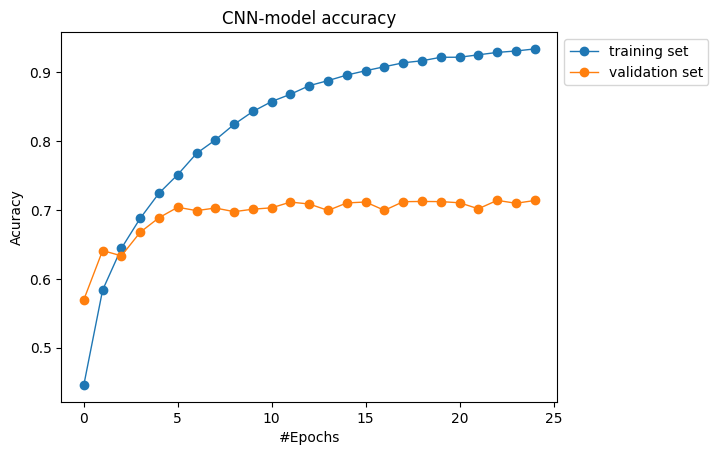

In [58]:
plt.plot(hist.history['accuracy'], label='training set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.plot(hist.history['val_accuracy'], label='validation set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.title("CNN-model accuracy")
plt.xlabel('#Epochs')
plt.ylabel('Acuracy')
plt.legend(bbox_to_anchor=( 1., 1.))

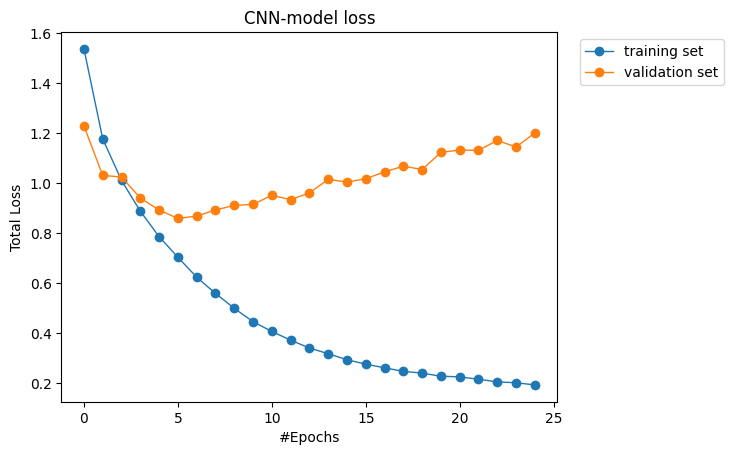

In [59]:
plt.plot(hist.history['loss'], label='training set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.plot(hist.history['val_loss'], label='validation set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.title("CNN-model loss")
plt.xlabel('#Epochs')
plt.ylabel('Total Loss')
plt.legend(bbox_to_anchor=( 1.35, 1.))

Compute the confusion matrix

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [60]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions on validation data
y_pred = model_CNN.predict(x_val) # TODO
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.3937624e-04, 5.3007123e-20, 9.9976057e-01, ..., 5.3238251e-12,
        3.2738538e-14, 3.0422697e-21],
       [1.4883139e-12, 1.6098390e-14, 9.9728377e-09, ..., 9.9988389e-01,
        3.1995400e-13, 1.7846435e-14],
       [6.1035144e-01, 1.6795121e-01, 1.6789578e-05, ..., 9.1548579e-13,
        2.1665135e-01, 5.0251544e-03],
       ...,
       [1.5683547e-03, 3.0966952e-01, 6.4245164e-02, ..., 3.5465239e-03,
        1.9350353e-01, 3.6110196e-02],
       [3.1693823e-08, 9.9997246e-01, 3.5259982e-11, ..., 3.6382344e-09,
        4.0116284e-08, 7.5469238e-06],
       [9.4392473e-01, 1.0144493e-03, 3.0663234e-06, ..., 3.1453529e-10,
        6.3360231e-03, 4.8716992e-02]], dtype=float32)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, size=15):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(size,size+2))
    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=18, family='serif')
    cb = plt.colorbar(im, fraction=0.046, pad=0.04)
    cb.ax.tick_params(labelsize=14)
    #Set the font type and size of the colorbar
    for l in cb.ax.yaxis.get_ticklabels():
        l.set_family("serif")

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontname='serif', size=14)
    plt.yticks(tick_marks, classes, fontname='serif', size=14)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 family='serif',
                 size=12)


    plt.ylabel('True label', size=18, fontname='serif')
    plt.xlabel('Predicted label', size=18, fontname='serif')
    plt.tight_layout()
    plt.show()

In [64]:
# Get confusion matrix (check documentation)

y_pred_labels = np.argmax(y_pred, axis=1)

# Convert true labels to class labels if they are one-hot encoded
y_val_labels = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val

# Compute confusion matrix
cm = confusion_matrix(y_val_labels, y_pred_labels) # TODO

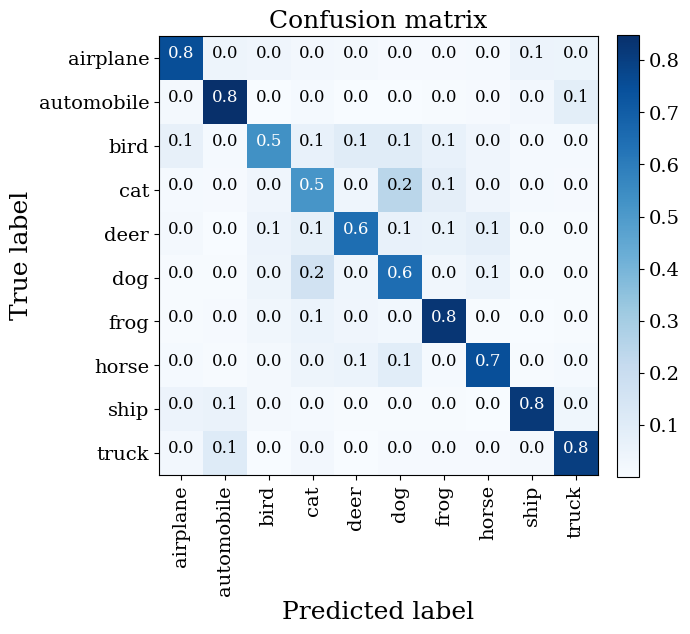

In [66]:
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert true labels to class labels if they are one-hot encoded
y_val_labels = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val

# Compute confusion matrix
cm = confusion_matrix(y_val_labels, y_pred_labels)

plot_confusion_matrix(cm, LABELS.values(),
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, size=7)

In [67]:
# Report
print(classification_report(y_val_labels, y_pred_labels, target_names=LABELS.values())) # TODO

              precision    recall  f1-score   support

    airplane       0.78      0.75      0.77      1000
  automobile       0.77      0.85      0.81      1000
        bird       0.70      0.53      0.61      1000
         cat       0.53      0.52      0.52      1000
        deer       0.69      0.64      0.67      1000
         dog       0.54      0.65      0.59      1000
        frog       0.75      0.83      0.79      1000
       horse       0.76      0.75      0.75      1000
        ship       0.86      0.82      0.84      1000
       truck       0.79      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



##### Plot the results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


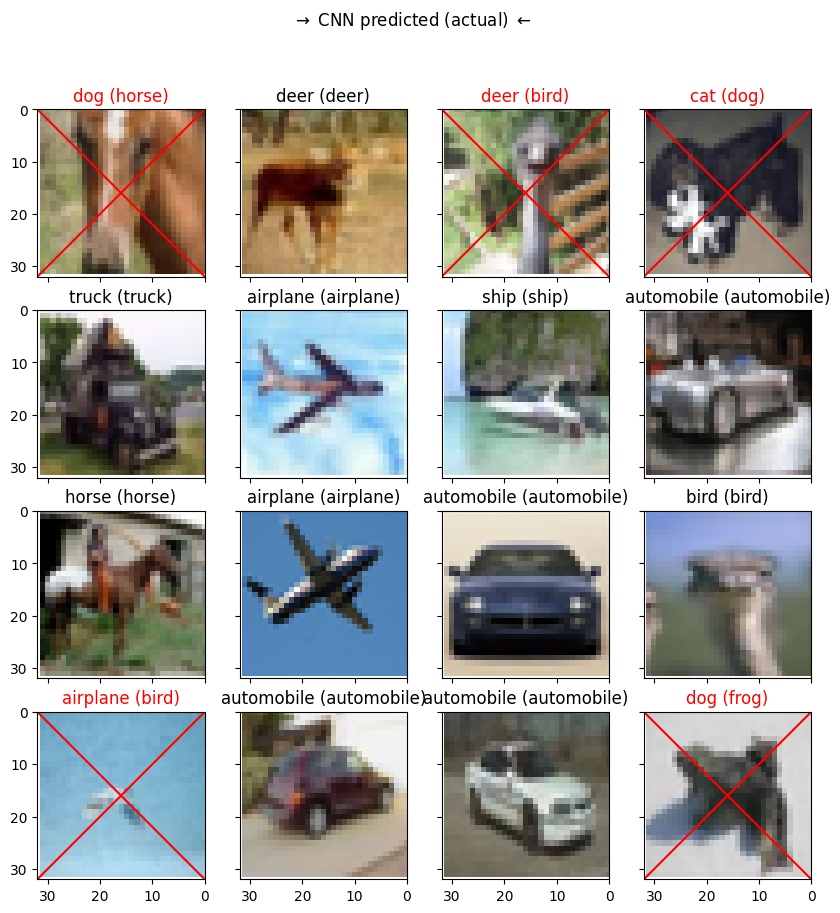

In [68]:
# Sample test data
ix = np.random.randint(0, 10000, size=16)
ex_im = x_val[ix]
ex_lb = y_val[ix]

# Predict
out = model_CNN.predict(ex_im) #model_CNN
classes = np.argmax(out, axis=1)  # softmax output -> class

# Plot
fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True);
fig.suptitle(r'$\rightarrow$ CNN predicted (actual) $\leftarrow$')

k = 0
for i in range(4):
    for j in range(4):
        # Switch Axes
        ax = axes[i, j]

        # Show image
        ax.imshow(ex_im[k]);

        # Determine labels
        actual_lab = LABELS[np.argmax(ex_lb[k])]
        pred_lab = LABELS[classes[k]]

        # Format title
        title = "{} ({})".format(pred_lab, actual_lab)
        title_color = 'black'

        # Mark image if wrong prediction
        if actual_lab != pred_lab:
            ax.plot(np.array([0, 32]), np.array([0, 32]), 'r-')
            ax.plot(np.array([0, 32]), np.array([32, 0]), 'r-')
            title_color = 'red'

        # Set title
        ax.set_title(title, color=title_color);

        # Set limits
        ax.set_xlim(32, 0)
        ax.set_ylim(32, 0)

        k += 1

# save_dir=os.path.join('yourpath','figs')
# if not(os.path.isdir(save_dir)):
#     os.mkdir(save_dir)
# fig.savefig(os.path.join(save_dir,'exemplary_images.png'))

## 2. Build your own CNN and MLP

### Objectives:
- Implement a CNN and a MLP to compare performances on CIFAR-10
- Adjust the CNN on the validation set to get the best performances. Play with the hyperparameters. Analyze and comment your results.
- Learn the final model on the full training data and test on the test data
- Have a look on: https://www.tensorflow.org/tutorials/images/cnn

----> Use the functions we defined above in the notebook

### First, focus on CNNs

Here, you can adjust your model by adding more convolutionnal layers, playing with the number of filters or adding some regularizations. One good thing is to use EarlyStopping.

In [ ]:
# Implement a new architecture of a MLP and/or CNN
# TODO

from tensorflow.keras.layers import ....

In [ ]:
# Train new model
# TODO

### Hyperparameters tuning

Think about the impact of the following hyperparameters, what are they useful for ?
- batch size
- learning rate
- number of layers
- hidden units in layers

In [ ]:
# Hyperparameters tuning:
# TODO

Have you thought about data augmentation ?
Help: https://www.tensorflow.org/tutorials/images/data_augmentation#data_augmentation_3

In [ ]:
# Data augmentation
# TODO

In [ ]:
# Analyse results
# TODO

### Try the same experiments with a new MLP model

## Compare MLP and CNN

In [ ]:
# TODO